In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import matplotlib.font_manager as font_manager
import matplotlib as mpl

from matplotlib import rcParams
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/Users/danielarisaro/Documents/Fundar/indice-mercado-trabajo-ingresos/'

# Fuente para los graficos
font_dir = [pathdata + 'basemaps/Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

rcParams['font.family'] = 'Archivo'

# Colores fundar
fundar_colores_primarios = ['#7BB5C4', '#9FC1AD', '#D3D3E0',  '#8d9bff', '#FF9750', '#FFD900',]
fundar_colores_secundarios = ['#B5E0EA', '#B3B3B3', '#848279', '#AFA36E', '#5D896F', '#9C9CBC', '#E27124']
fundar_white = '#F5F5F5'
fundar_black = '#151515'

# Directorio de los archivos .xlsx
directorio = "/home/daniufundar/Documents/Fundar/proyecto_pesca/data/Exportaciones/"
directorio = '/Users/danielarisaro/Documents/Fundar/proyecto_pesca/data/Exportaciones/'


In [70]:

# Specify the directory and file path
directory = '/Users/danielarisaro/Documents/Fundar/proyecto_pesca/data/Exportaciones/'
file_name = 'complexp_variacion_1993_2022.xls'
file_path = os.path.join(directory, file_name)

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Read each sheet and extract the required information
for sheet_name in ['1993-1996', '1997-2000', '2001-2004', '2005-2008',
                   '2009-2012', '2013-2016', '2017-2018', '2019-2022']:
    years = [int(year) for year in sheet_name.split('-')]

    nyears = years[-1] - years[0]

    df = pd.read_excel(file_path, sheet_name, header=3, index_col=0, usecols=range(nyears+2))
    
    numeric_columns = [int(re.search(r'\d+', str(col)).group()) for col in df.columns]

    selected_rows = df.loc[["Total de exportaciones", "Complejo pesquero", 'Sector bovino']]

    selected_rows.columns = numeric_columns

    selected_rows = selected_rows.T

    selected_rows.index.name = 'Year'

    result_df = pd.concat([result_df, selected_rows])

# Convert the index to integer type
result_df.index = result_df.index.astype(int)    

result_df


,Total de exportaciones,Complejo pesquero,Sector bovino
Year,,,
1993,13118,709,1400
1994,15839.0,727.0,1853.0
1995,20963.0,917.0,2451.0
1996,23811.0,1011.0,2182.0
1997,26431,1035,2238
1998,26434.0,922.0,1904.0
1999,23309.0,809.0,1916.0
2000,26341.0,838.0,1871.0
2001,26543,956,1392


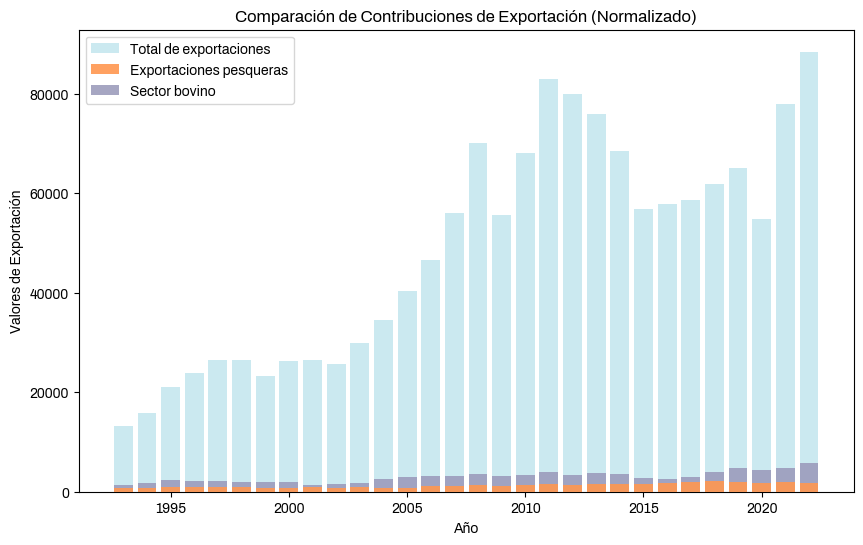

In [91]:
import matplotlib.pyplot as plt

exportaciones_totales = result_df["Total de exportaciones"]
exportaciones_pesqueras = result_df["Complejo pesquero"]
exportaciones_sector_bovino = result_df["Sector bovino"]

pesqueras_normalized = exportaciones_pesqueras / exportaciones_totales
bovino_normalized = exportaciones_sector_bovino / exportaciones_totales

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(result_df.index, exportaciones_totales, label="Total de exportaciones", 
       color=fundar_colores_secundarios[0], alpha=0.7)
ax.bar(result_df.index, exportaciones_totales * pesqueras_normalized, label="Exportaciones pesqueras", 
       color=fundar_colores_primarios[4], alpha=0.9, zorder=3)
ax.bar(result_df.index, exportaciones_totales * bovino_normalized, label="Sector bovino", 
       color=fundar_colores_secundarios[5], alpha=0.9)

ax.set_xlabel('Año')
ax.set_ylabel('Valores de Exportación')
ax.set_title('Comparación de Contribuciones de Exportación (Normalizado)')
ax.legend()



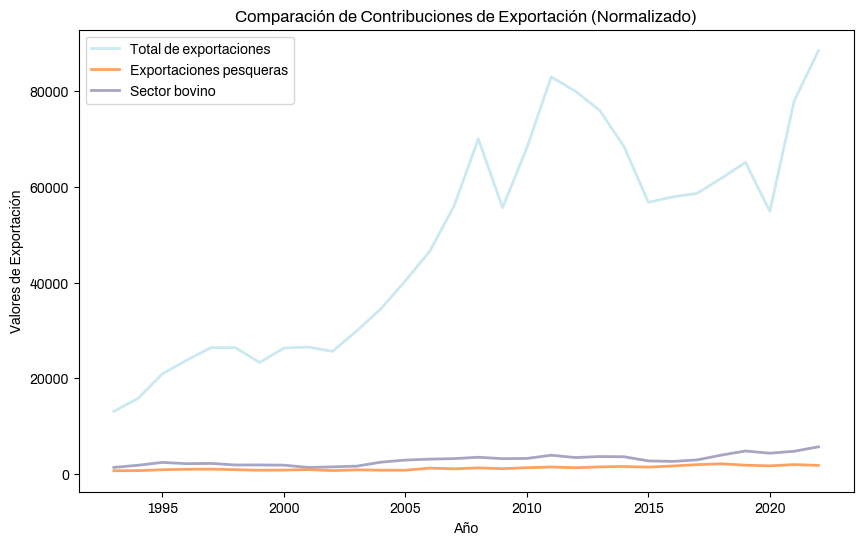

In [92]:
import matplotlib.pyplot as plt

exportaciones_totales = result_df["Total de exportaciones"]
exportaciones_pesqueras = result_df["Complejo pesquero"]
exportaciones_sector_bovino = result_df["Sector bovino"]

pesqueras_normalized = exportaciones_pesqueras / exportaciones_totales
bovino_normalized = exportaciones_sector_bovino / exportaciones_totales

fig, ax = plt.subplots(figsize=(10, 6))

# Línea para las exportaciones totales
ax.plot(result_df.index, exportaciones_totales, label="Total de exportaciones", 
        color=fundar_colores_secundarios[0], linewidth=2, alpha=0.7)

# Línea para las exportaciones pesqueras normalizadas
ax.plot(result_df.index, exportaciones_totales * pesqueras_normalized, label="Exportaciones pesqueras", 
        color=fundar_colores_primarios[4], linewidth=2, alpha=0.9, zorder=3)

# Línea para las exportaciones del sector bovino normalizadas
ax.plot(result_df.index, exportaciones_totales * bovino_normalized, label="Sector bovino", 
        color=fundar_colores_secundarios[5], linewidth=2, alpha=0.9)

ax.set_xlabel('Año')
ax.set_ylabel('Valores de Exportación')
ax.set_title('Comparación de Contribuciones de Exportación (Normalizado)')
ax.legend()

plt.show()
